<a href="https://colab.research.google.com/github/lazizrakhmat/DS-Deep-Learning/blob/main/_1DL_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Birinchi modelimizni  
## Maqsad: Sun'iy Neyron Tarmoqlari yordamida mushuklarni taniy oladigan model qurish.
**Model haqida:** *Biz bu yerda ```rasnet34``` deb nomlanuvchi ```1.3```mln ta rasm yordamida o'qitilgan modeldan foydalanamiz.*

**Dataset:** *Oxford-IIIT Pet Dataset (```7349``` ta mushuk(cat) va it(dog) larning rasmidantashkil topgan dataset)*





In [1]:
# kutubxonalar
from fastai.vision.all import *
from ipywidgets import widgets

# data
path = untar_data(URLs.PETS)/'images'

# labellovchi funksiya
def is_cat(x): return x[0].isupper()

# datalarni yuklovchi (dataloaders)
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224)
)

# o'qitish (train)
learn = cnn_learner(dls, resnet34, metrics=accuracy)
learn.fine_tune(2)

/usr/local/lib/python3.8/dist-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pt

  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,accuracy,time
0,0.159537,0.025905,0.989851,00:57


epoch,train_loss,valid_loss,accuracy,time
0,0.068889,0.104040,0.975643,00:55
1,0.032094,0.015765,0.994587,00:57


## Model ishlashini tekshirib ko'ramiz

In [17]:
# rasm yuklash uchun widget
upload = widgets.FileUpload()
upload

FileUpload(value={}, description='Upload')

Mushukmi: True
Aniqlilik ehtimoli: 0.992


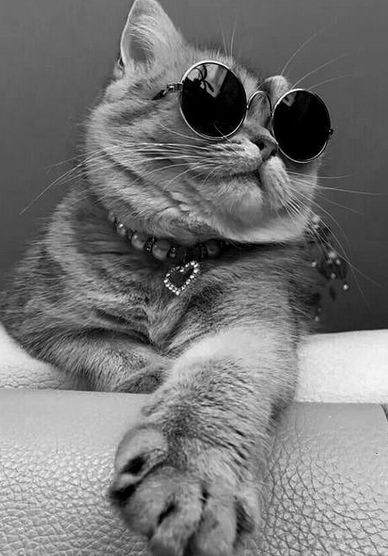

In [18]:
img = PILImage.create(upload.data[-1]) #rasm
pred, _, prob = learn.predict(img) # bashorat qilish (predict)
print(f'Mushukmi: {pred}')
print(f'Aniqlilik ehtimoli: {prob[1].item():.3f}')
img